In [15]:
from __future__ import print_function
from pathlib import Path
from random import shuffle
import random

import argparse
import copy
import numpy as np
import sys
import tensorflow as tf
import scipy.sparse as sp
import sys

import sys
sys.path.append("..") 
from deeplp.models.deeplp_att import DeepLP_ATT
from deeplp.models.deeplp_edge import DeepLP_Edge
from deeplp.models.deeplp_wrbf import DeepLP_WRBF
from deeplp.models.lp import LP
from deeplp.utils import (calc_masks, create_seed_features, load_data,
                          num_layers_dict, prepare_data, random_unlabel)
from datasets import utils
color_list = {
    0: '#E97778',
    1: '#bf1a2f',
    2: '#454e9e',
    6: '#89C7B6',
    4: '#f7d002',
    5: '#41ead4',
    3: '#FFD57E'
}

In [6]:
thetas = np.zeros((1,36))

In [45]:
true_labels, features, graph \
= load_data('linqs_cora')
U,D,B,R = utils.load_data('cora','linqs','../datasets')
edges = np.array(B.edges())
sources,sinks = edges[:,0],edges[:,1]
labeled_indices, unlabeled_indices = \
        random_unlabel(true_labels,0.99,
                       seed=9)
# org=np.loadtxt('org.csv',delimiter=',')
# opt=np.loadtxt('opt.csv',delimiter=',')
seed_features = create_seed_features(graph, labeled_indices, true_labels)
if len(features) == 0:
    features = seed_features
else:
    features = np.hstack([features, seed_features])

In [46]:
thetas = np.zeros((1,36))
np.sum(features * thetas,1) + 1

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [47]:
opt=np.array([-7.256224,-4.016766,0.065504,0.00104,-0.000153,-0.003066,0.000061,-3.419517,-0.012922,0.950572,-2.567075,2.782797,-2.15841,-2.078068,1.313177,-0.012378,-2.772249,1.67692,0.954168,3.551954,0.000092,-0.000098,-0.001875,0.00007,-0.003274,-0.000016,-0.000705,-0.000027,-0.000605,-0.00109,0.000062,-0.002734,0.000009,0.000009,0.008692,-0.000676])

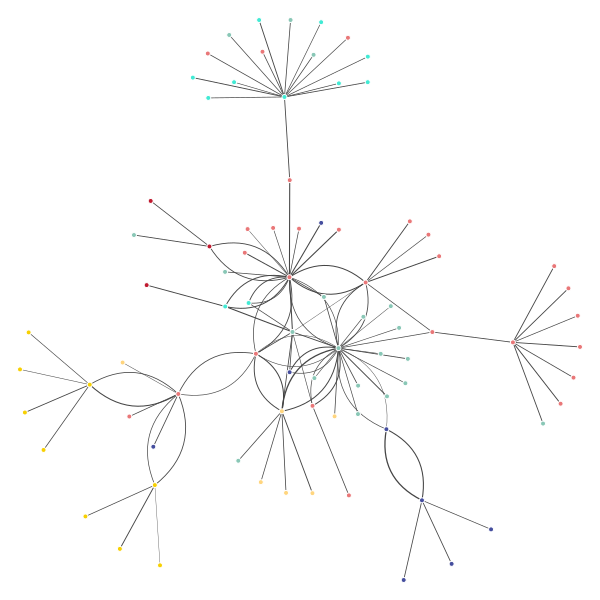

In [62]:
random_u_indices = np.array(list(set([11,164,  1187, 1212, 1319, 1527, 1621, 1624,
       1851, 2044, 2050, 85,  748, 1497, 1582, 1698, 2194])))
neighbors_node_indices = random_u_indices
for this in random_u_indices:
    neighbors_node_indices = np.append(neighbors_node_indices,graph[this].indices)
neighbors_node_indices = np.sort(list(set(neighbors_node_indices))).astype(int)
G = nx.from_scipy_sparse_matrix(graph[neighbors_node_indices][:,neighbors_node_indices])
colors = [color_list[label] for label in np.argmax(true_labels[neighbors_node_indices],axis=1)]
colors = np.array(colors)
coo = graph[neighbors_node_indices][:,neighbors_node_indices].tocoo()
cols = coo.col
rows = coo.row
org_rows = graph.tocoo().row
org_cols = graph.tocoo().col
edge_indices = []
rsub = []
csub = []
seqs = []
i = 0
prev = rows[0]
for r,c in zip(rows,cols):
    if neighbors_node_indices[r] in random_u_indices:
        if r == prev:
            i += 1
        else:
            i = 1
            c
        
        rsub.append(r)
        csub.append(c)
        edge_indices.append(np.where((org_rows == neighbors_node_indices[r]) & (org_cols == neighbors_node_indices[c]))[0][0])
        prev = r
a=np.vstack([rsub,csub])
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
# a = list(zip(*nx.to_edgelist(G)))[:2]
g1 = ig.Graph(len(G), list(zip(*np.flip(a,0))),directed=False)
layout = g1.layout()
# g1.vs['label'] = labels
# g1.es['width'] = np.random.uniform(low=0.0, high=1.0, size=int(np.sum(graph)))
g1.es['width'] = (np.sum(features * opt,1) - np.min(np.sum(features * opt,1))) / 10
ig.plot(g1,layout=layout, vertex_color=colors, vertex_size=5, vertex_label_dist=2, edge_arrow_size=0.0, vertex_frame_color='white')
# ig.plot(g1,vertex_color=colors, vertex_size=5, layout=layout)
# ,vertex_size=utils.listify(G.degree())

In [59]:
np.max(np.sum(features * opt,1))

1.4038100247798144

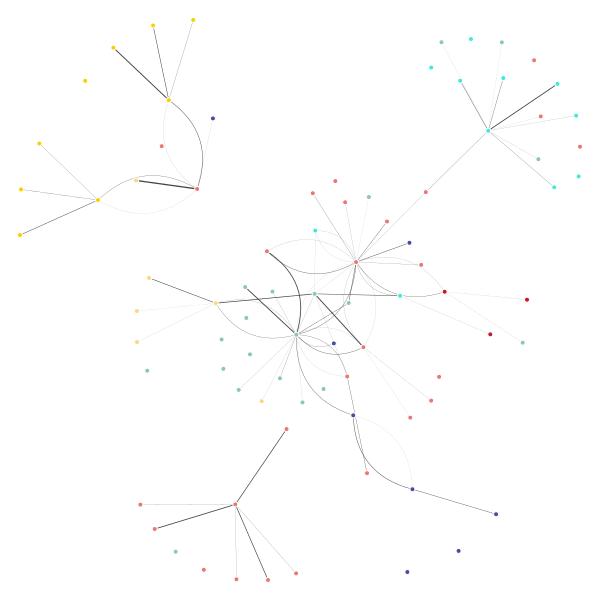

In [177]:
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
# a = list(zip(*nx.to_edgelist(G)))[:2]
g1 = ig.Graph(len(G), list(zip(*np.flip(a,0))),directed=False)
# g1.vs['label'] = labels
# g1.es['width'] = np.random.uniform(low=0.0, high=1.0, size=int(np.sum(graph)))
g1.es['width'] = opt * 1/org / 5
ig.plot(g1,layout=layout, vertex_color=colors, vertex_size=5, vertex_label_dist=2, edge_arrow_size=0.0, vertex_frame_color='white')
# ig.plot(g1,vertex_color=colors, vertex_size=5, layout=layout)
# ,vertex_size=utils.listify(G.degree())

In [57]:
(np.sum(features * opt,1) - np.min(np.sum(features * opt,1)))

array([  5.84735293,   4.76480194,   4.97234566, ...,  11.61477287,
         7.31743091,  12.45013449])

array([1., 1., 1., ..., 1., 1., 1.])

In [53]:
np.sum(features * opt,1)

array([-10.30764823, -11.39019923, -11.18265551, ...,  -4.5402283 ,
        -8.83757025,  -3.70486667])